In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statistics

def read_sensor_txt(path, sep=";"):
    t_iso = np.genfromtxt(path, delimiter=sep, skip_header=1, usecols=0, dtype=str)[::-1]
    data = np.genfromtxt(path, delimiter=sep, skip_header=1, usecols=(1,2,3), dtype=float)

    x = data[:, 0]
    y = data[:, 1]
    z = data[:, 2]

    return t_iso, x, y, z
def iso_to_seconds(t_iso):
        dt = np.array([datetime.fromisoformat(str(s)) for s in t_iso])
        t0 = dt[0]
        t_sec = np.array([(d-t0).total_seconds() for d in dt], dtype=float)
        return t_sec

def draw_plot_from_file(file, header):
    t_iso, x, y, z = read_sensor_txt(file)
    t_sec = iso_to_seconds(t_iso)
    draw_plot_from_data(t_iso,x,y,z,header)

def draw_plot_from_data(t, arrX, arrY, arrZ, header):
    plt.figure(figsize=(15, 3))
    
    plt.plot(t, arrX, label='Oś X', linewidth=1.5, alpha=0.8)
    plt.plot(t, arrY, label='Oś Y', linewidth=1.5, alpha=0.8)
    plt.plot(t, arrZ, label='Oś Z', linewidth=1.5, alpha=0.8)

    plt.title(header)
    plt.xlabel("Time")
    plt.ylabel("Value")
    
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

def draw_single_plot_from_data(arrX, arrY, header, axisLabel):
    plt.figure(figsize=(15, 3))
    
    plt.plot(arrX, arrY, label=axisLabel, linewidth=1.5, alpha=0.8)

    plt.title(header)
    plt.xlabel("Time")
    plt.ylabel("Value")
    
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

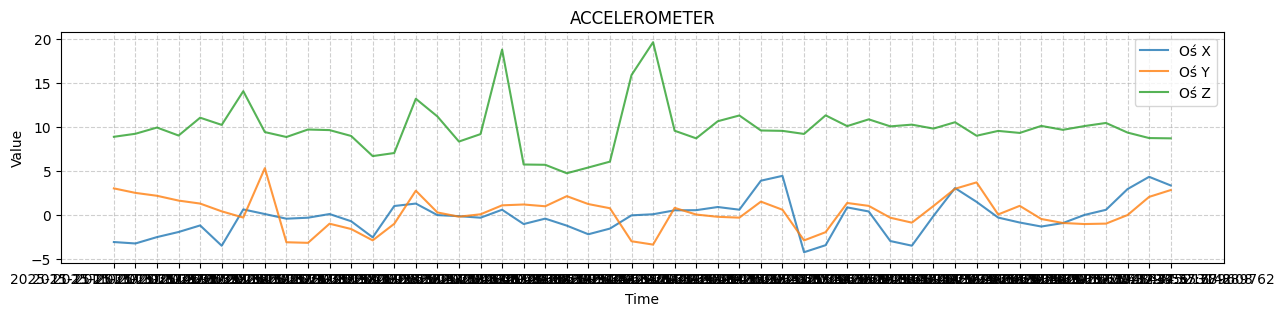

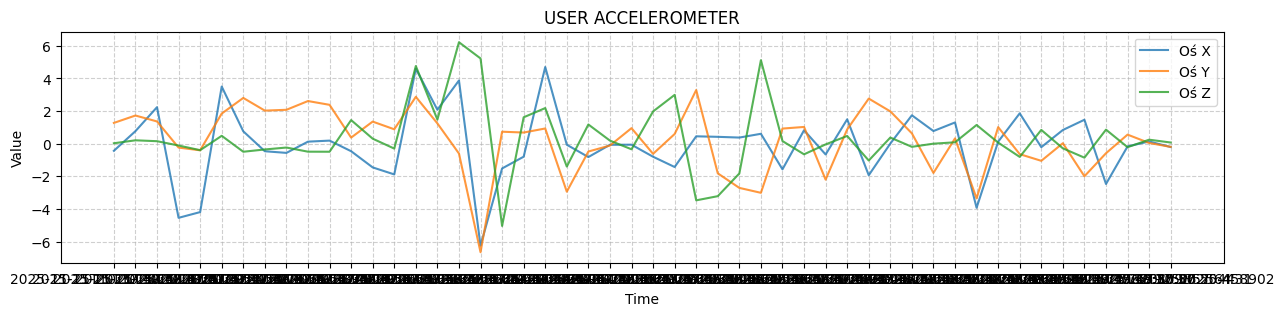

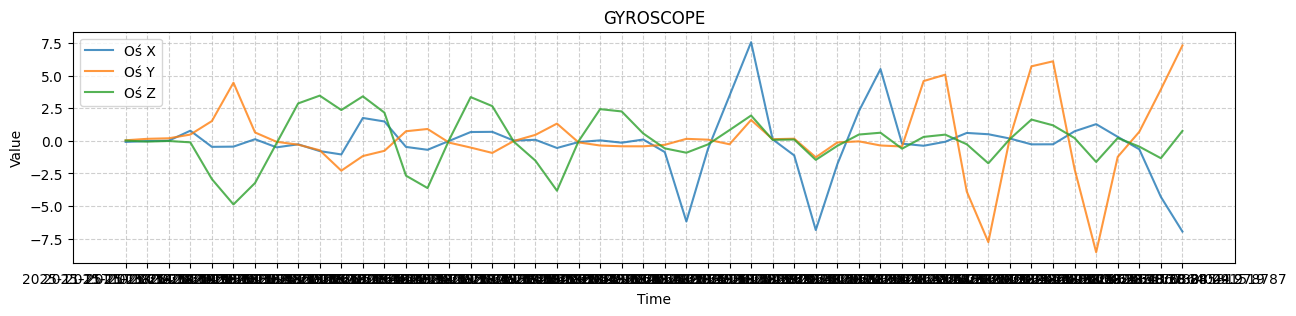

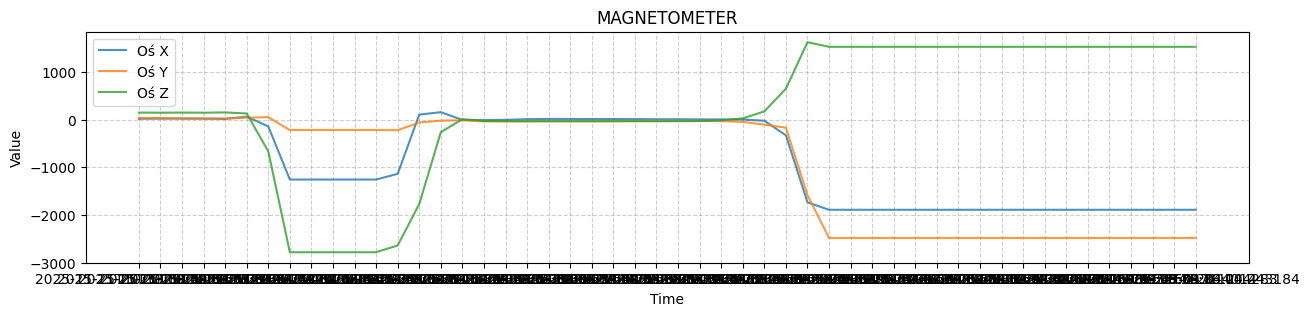

In [ ]:
#ZADANIE 1
draw_plot_from_file("accel.txt", "ACCELEROMETER")
draw_plot_from_file("uaccel.txt", "USER ACCELEROMETER")
draw_plot_from_file("gyro.txt", "GYROSCOPE")
draw_plot_from_file("magnetometer.txt", "MAGNETOMETER")


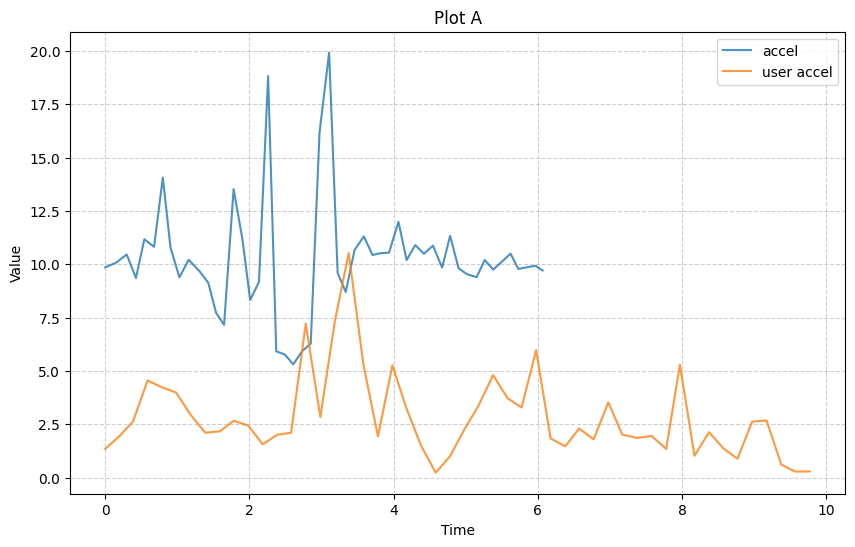

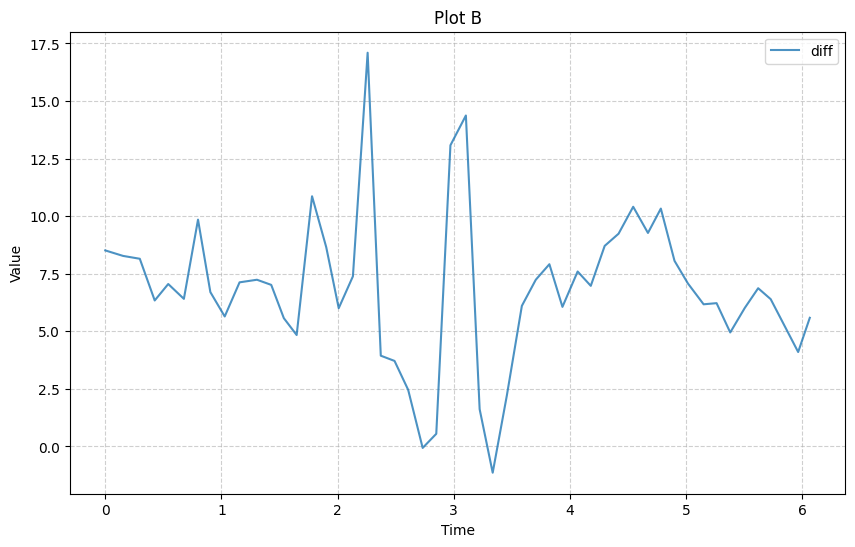

In [ ]:
#ZADANIE 2 A
t_iso_a, x_a, y_a, z_a = read_sensor_txt("accel.txt")
t_sec_a = iso_to_seconds(t_iso_a)
magnitude_a = np.sqrt(x_a**2 + y_a**2 + z_a**2)

t_iso_b, x_b, y_b, z_b = read_sensor_txt("uaccel.txt")
t_sec_b = iso_to_seconds(t_iso_b)
magnitude_b = np.sqrt(x_b**2 + y_b**2 + z_b**2)

magnitude_b_interp = np.interp(t_sec_a, t_sec_b, magnitude_b)
magnitude_c = magnitude_a - magnitude_b_interp

#Plot A
plt.figure(figsize=(10, 6))

plt.plot(t_sec_a, magnitude_a, label='accel', linewidth=1.5, alpha=0.8)
plt.plot(t_sec_b, magnitude_b, label='user accel', linewidth=1.5, alpha=0.8)

plt.title("Plot A")
plt.xlabel("Time")
plt.ylabel("Value")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Plot B
plt.figure(figsize=(10, 6))

plt.plot(t_sec_a, magnitude_c, label='diff', linewidth=1.5, alpha=0.8)

plt.title("Plot B")
plt.xlabel("Time")
plt.ylabel("Value")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Średnie żyroskopu: x-0.1516 y0.24632 z0.04163999999999999
Średnie magnetometru: x-864.6191 y-962.7954599999999 z223.16502
Odchylenia standardowe żyroskopu: x2.3691014054674304 y2.7781847725095754 z1.8818867839897018
Odchylenia standardowe magnetometru: x896.7106671425487 y1172.165392116575 z1369.8204024135082
Wariancje żyroskopu: x5.612641469387755 y7.718310630204082 z3.541497867755102
Wariancje magnetometru: x804090.0205672347 y1373971.7064758043 z1876407.934868306


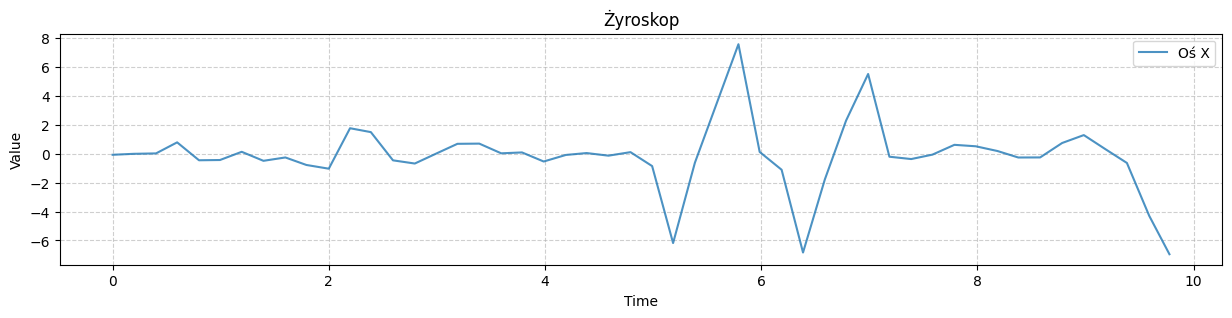

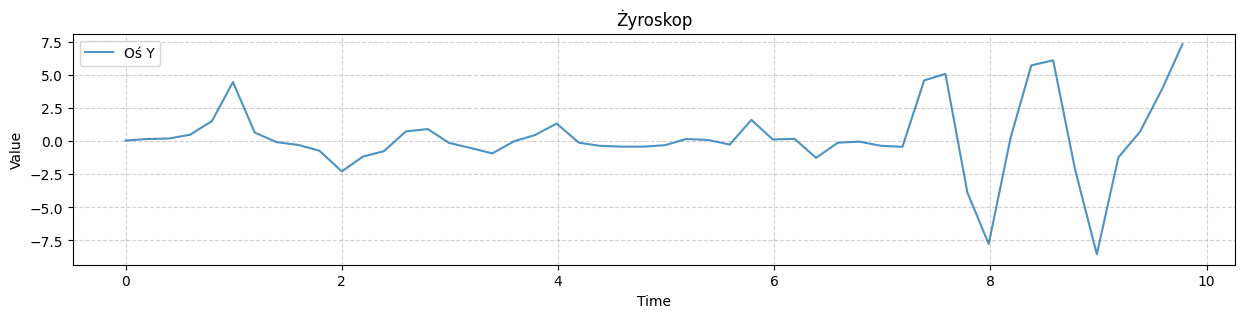

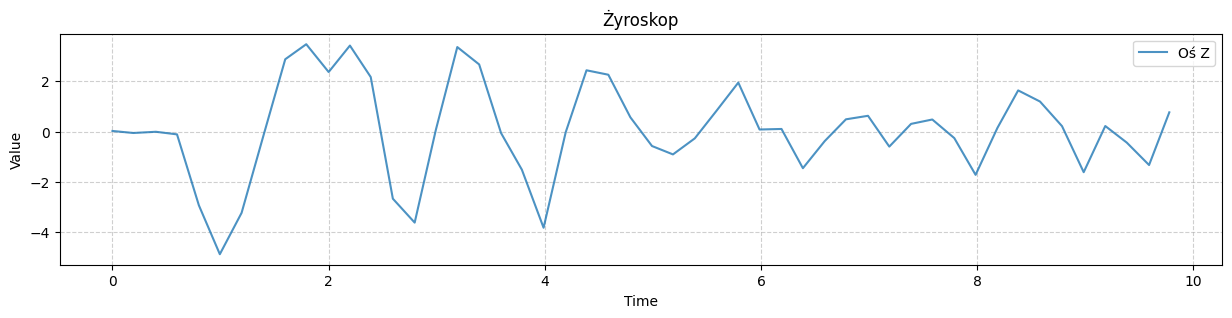

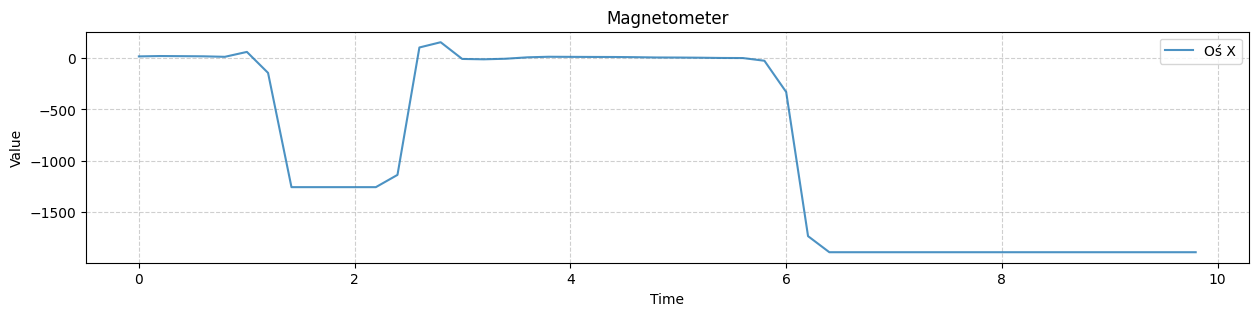

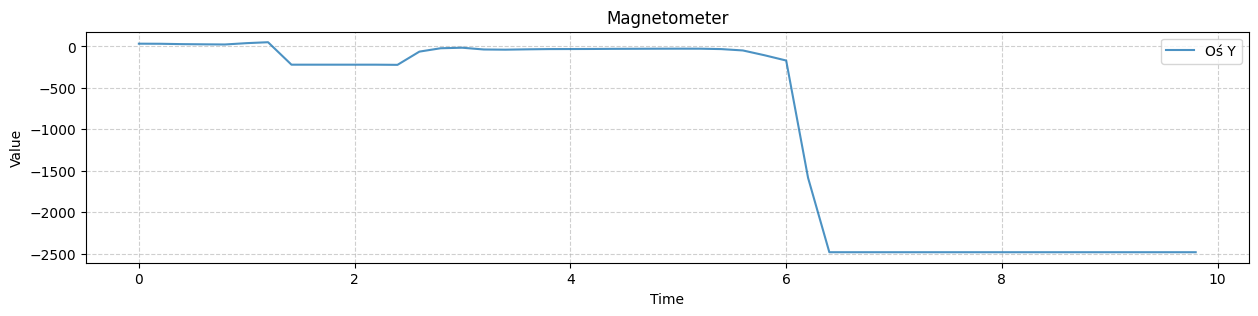

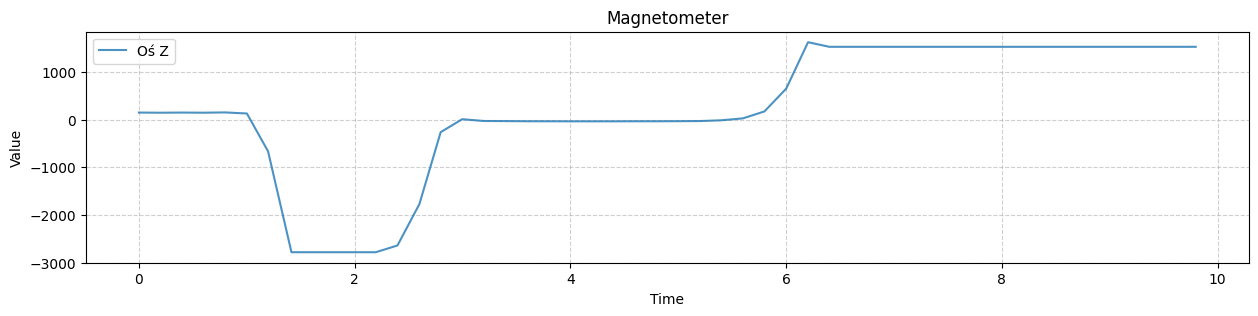

In [ ]:
#Zadanie 3
def getVals(data):
    return statistics.mean(data),statistics.stdev(data), statistics.variance(data)

t_g, x_g, y_g, z_g = read_sensor_txt("gyro.txt")
t_g = iso_to_seconds(t_g)
mean_g_x, stdev_g_x, variance_g_x = getVals(x_g)
mean_g_y, stdev_g_y, variance_g_y = getVals(y_g)
mean_g_z, stdev_g_z, variance_g_z = getVals(z_g)

t_m, x_m, y_m, z_m = read_sensor_txt("magnetometer.txt")
t_m = iso_to_seconds(t_m)

mean_m_x, stdev_m_x, variance_m_x = getVals(x_m)
mean_m_y, stdev_m_y, variance_m_y = getVals(y_m)
mean_m_z, stdev_m_z, variance_m_z = getVals(z_m)

print(f"Średnie żyroskopu: x{mean_g_x} y{mean_g_y} z{mean_g_z}")
print(f"Średnie magnetometru: x{mean_m_x} y{mean_m_y} z{mean_m_z}")

print(f"Odchylenia standardowe żyroskopu: x{stdev_g_x} y{stdev_g_y} z{stdev_g_z}")
print(f"Odchylenia standardowe magnetometru: x{stdev_m_x} y{stdev_m_y} z{stdev_m_z}")

print(f"Wariancje żyroskopu: x{variance_g_x} y{variance_g_y} z{variance_g_z}")
print(f"Wariancje magnetometru: x{variance_m_x} y{variance_m_y} z{variance_m_z}")

noise_g = (stdev_g_x + stdev_g_y + stdev_g_z)/3
noise_m = (stdev_m_x + stdev_m_y + stdev_m_z)/3
print(f"Średnie odchylenia: żyroskop:{noise_g} | magnetometer: {noise_m}")

if(noise_g>noise_m): 
    print("Żyroskop jest bardziej zaszumiony")
elif(noise_g<noise_m):
    print("Magnetometer jest bardziej zaszumiony (przyłożyłem telefon do bardzo silnego magnesu)")
else:
    print("Oba sensory są identycznie zaszumione")

if (stdev_m_x > stdev_m_y and stdev_m_x > stdev_m_z):
    print("Dla magnetometru osią z największym rozrzutem jest oś X")
elif (stdev_m_y > stdev_m_x and stdev_m_y > stdev_m_z):
    print("Dla magnetometru osią z największym rozrzutem jest oś Y")
elif (stdev_m_z > stdev_m_x and stdev_m_z > stdev_m_y):
    print("Dla magnetometru osią z największym rozrzutem jest oś Z")
else:
    print("Dla magnetometru wszystkie osie mają porównywalny rozrzut")

if (stdev_g_x > stdev_g_y and stdev_g_x > stdev_g_z):
    print("Dla żyroskopu osią z największym rozrzutem jest oś X")
elif (stdev_g_y > stdev_g_x and stdev_g_y > stdev_g_z):
    print("Dla żyroskopu osią z największym rozrzutem jest oś Y")
elif (stdev_g_z > stdev_g_x and stdev_g_z > stdev_g_y):
    print("Dla żyroskopu osią z największym rozrzutem jest oś Z")
else:
    print("Dla żyroskopu wszystkie osie mają porównywalny rozrzut")

draw_single_plot_from_data(t_g,x_g,"Żyroskop","Oś X")
draw_single_plot_from_data(t_g,y_g,"Żyroskop","Oś Y")
draw_single_plot_from_data(t_g,z_g,"Żyroskop","Oś Z")

draw_single_plot_from_data(t_m,x_m,"Magnetometer","Oś X")
draw_single_plot_from_data(t_m,y_m,"Magnetometer","Oś Y")
draw_single_plot_from_data(t_m,z_m,"Magnetometer","Oś Z")


In [ ]:
#zadanie 4